<a href="https://colab.research.google.com/github/toche7/mdsLab6/blob/main/Colab8_KMean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab 8 K-Mean Clustering
ver: 001


อีกประเภทหนึ่งของ Machine Learning ก็คือ Unservised Learning  หรือการเรียนรู้แบบไม่มีผู้สอนโดยในกลุ่มนี้จะไม่ได้มีวัตถุประสงค์ในการทำนายหรือคาดการณ์คำตอบ แต่โดยส่วนใหญ่จะเป็นเรื่องของการเตรียม ข้อมูล อาทิ การแบ่งกลุ่มข้อมูล การลดมิติข้อมูล หรือการตรวจจับความผิดปกติของข้อมูล สำหรับเนื้อหาในบทนี้ในส่วนนี้เราจะยกตัวอย่างโดยการใช้เทคนิค K-mean ในการแบ่งกลุ่มข้อมูลหรือ Clustering  ดังจะได้แสดงให้เห็นดังต่อไปนี้


K-mean เป็นเทคนิคในการแบ่งข้อมูลออกเป็นกลุ่ม ๆ โดยจำนวนกลุ่มจะถูกแบ่งออกเป็น K กลุ่มด้วยกัน โดยหลักการของ k-mean นั้นจะใช้เทคนิคการวัดระยะห่าง จากตัวข้อมูลนั้นๆไปยังเจุดศูนย์กลางกลุ่มข้อมูล โดยจำนวนกลุ่มข้อมูลจะต้องมีการกำหนดขึ้นมาก่อนว่าจะมีกี่ตัวอย่างเช่นกำหนดเป็น 2  กลุ่ม k ก็จะเท่ากับ 2 ถ้ากำหนดเป็น 3 กลุ่มเขตก็จะเท่ากับ 3 เป็นต้น


Model Theory
https://scikit-learn.org/stable/modules/clustering.html#k-means

Library Details
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


```
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
kmeans.labels_
```



| Method | Description |
| :------------ | :---------------------------------------------------------- |
| fit\(X \) | ทำการ Train Model เพื่อแบ่ง cluster |
|labels_ | รายการ cluster ที่กำกับข้อมูลในแต่ละแถว  |




## 8.1 K-means Clustering of the forest fires

ในการทดลองนี้เราจะได้ทำการแบ่งข้อมูลที่ Sensor ที่วัดจากป่าที่ประกอบด้วยค่าอุณหภูมิ (Temperature) ความชื้น (Humidity) และข้อมูลจะประวัติการเกิดไฟไหม้ (Fires) ด้วย แต่ในกรณีนี้เราจะไม่ได้นข้อมูลจะประวัติการเกิดไฟไหม้มาใช้งาน

ในการใช้งาน Python กรณีเราต้องใช้ Library ภายนอกมาใช้งานเราต้องทำการนำเข้า Library นั้นด้วยคำสั่ง Import ตาม Cell ด้านล่างนี้


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


###  Load Data

ทำการโหลดข้อมูลจากไฟล์ csv ไปเก็บไว้ใน df ซึ่งเป็นข้อมูลประเภท Dataframe ของ library Pandas <br>
กรณีที่อยากโหลดข้อมูลจากเวปไซท์โดยตรงแล้วมาเก็บไว้ในเครื่องให้เอา comment ของบรรทัด wget ออกก็จะเป็นการโหลดข้อมูลจากเวปมา save เป็นไฟล์ชื่อว่า forest_fires.csv

In [2]:
!wget https://raw.githubusercontent.com/adminho/machine-learning/master/Datasets/forest_fires.csv?dl=0 -O forest_fires.csv
df = pd.read_csv("forest_fires.csv")

--2024-07-20 04:19:19--  https://raw.githubusercontent.com/adminho/machine-learning/master/Datasets/forest_fires.csv?dl=0
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 189 [text/plain]
Saving to: ‘forest_fires.csv’

forest_fires.csv    100%[===================>]     189  --.-KB/s    in 0s      

2024-07-20 04:19:19 (9.09 MB/s) - ‘forest_fires.csv’ saved [189/189]



In [3]:
df.head()

,Temperature,Humidity,Fires
0,22.8,40,No
1,29.6,27,Yes
2,17.8,51,No
3,19.3,38,No
4,28.6,27,Yes


### Plot Graph

ทำการ plot graph เพื่อดูการกระจายของข้อมูลด้วยวิธีการ Library Pandas เปรียบเทียบ matplotlib

#### Plot graph using Pandas

<Axes: xlabel='Temperature', ylabel='Humidity'>

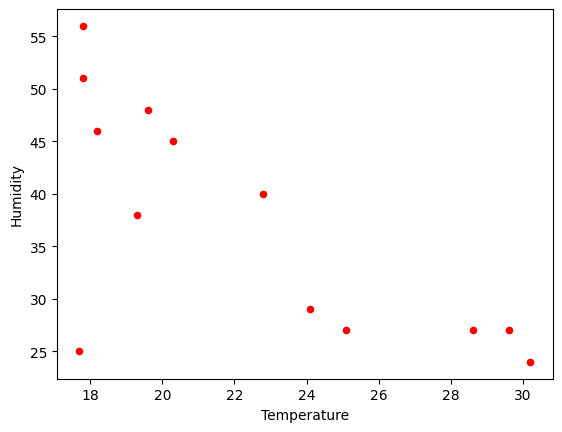

In [5]:
df.plot.scatter(x='Temperature', y='Humidity', c='Red')

### Training K-Means
ทำการ clustering ข้อมูลด้วยวิธีการ K-means ด้วย Library Scikit-Learn

In [6]:
from sklearn.cluster import KMeans
import numpy as np
X = df[['Temperature', 'Humidity']]
kmeans = KMeans(n_clusters=2, n_init=10, random_state=0).fit(X)
print("labels : ",  kmeans.labels_)    #print การแบ่ง cluster

labels :  [0 1 0 0 1 0 1 0 1 1 0 1 0]


In [7]:
for i, center in enumerate(kmeans.cluster_centers_):    #หา centroid ของแต่ละ cluster
  print("center %d:" %i, center)

center 0: [19.4        46.28571429]
center 1: [25.88333333 26.5       ]


In [8]:
X['label'] = kmeans.labels_
X

,Temperature,Humidity,label
0,22.8,40,0
1,29.6,27,1
2,17.8,51,0
3,19.3,38,0
4,28.6,27,1
5,17.8,56,0
6,17.7,25,1
7,18.2,46,0
8,25.1,27,1
9,30.2,24,1


In [10]:
X[X['label'] == 1]['Temperature']  #เช็คข้อมูล

1     29.6
4     28.6
6     17.7
8     25.1
9     30.2
11    24.1
Name: Temperature, dtype: float64

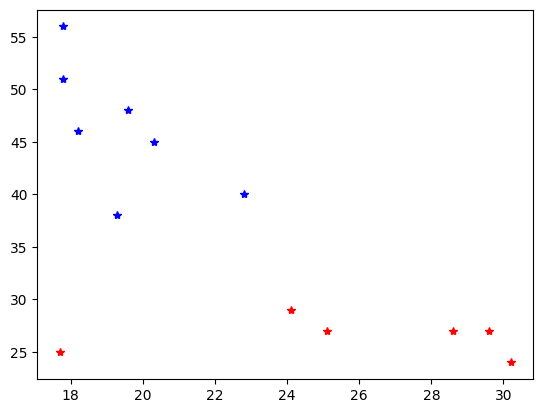

In [11]:
plt.plot(X[X['label'] == 1]['Temperature'],X[X['label'] == 1]['Humidity'], '*r')   #C=1
plt.plot(X[X['label'] == 0]['Temperature'],X[X['label'] == 0]['Humidity'], '*b')   #c=0
# plot แยกสี กรณี cluster 0, 1 


<Axes: xlabel='Temperature', ylabel='Humidity'>

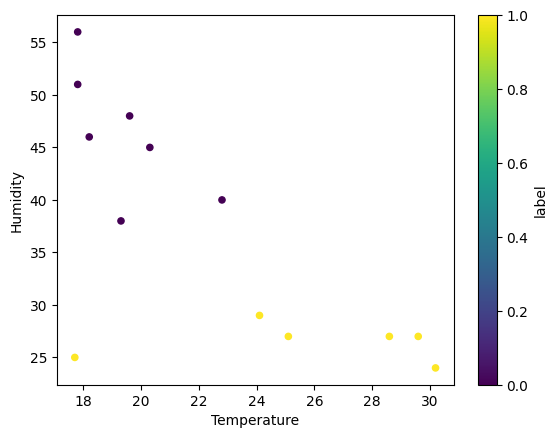

In [12]:
X.plot.scatter('Temperature','Humidity', c = 'label', colormap='viridis')

K-Mean Mesurement Matrix

In [14]:
from sklearn import metrics     #วัด score ด้วย silhouette  ค่าสูงสุด = 1
metrics.silhouette_score(X, kmeans.labels_)

np.float64(0.6453714578989221)

In [15]:
X

,Temperature,Humidity,label
0,22.8,40,0
1,29.6,27,1
2,17.8,51,0
3,19.3,38,0
4,28.6,27,1
5,17.8,56,0
6,17.7,25,1
7,18.2,46,0
8,25.1,27,1
9,30.2,24,1


In [16]:
kmeans.inertia_    #ค่า cost ของ model ที่คำนวณได้

374.4969047619047

In [17]:
kmeans.score(X[['Temperature', 'Humidity']])   #เป็นค่า inertia เอามาติดลบ ยิ่งถ้าติดลบไม่ดี

-374.49690476190466

### 2.4 Elbow method

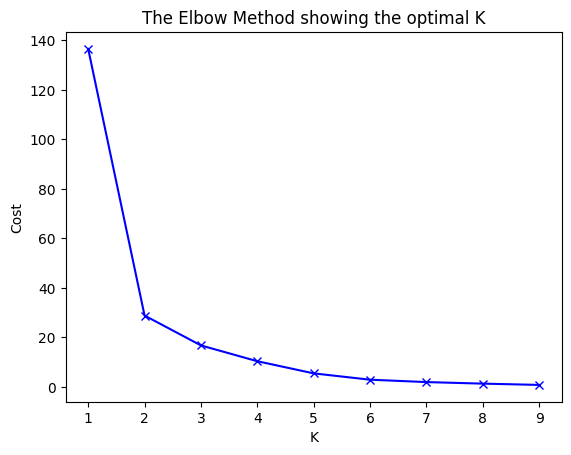

In [18]:
from sklearn import metrics
# k means determine k
silScore = []
cost = []
K = range(1,10)
X = df[['Temperature', 'Humidity']]
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=10).fit(X)
    kmeans = kmeanModel.fit(X)
    cost.append(kmeans.inertia_/ X.shape[0])
    if k > 1 : silScore.append(metrics.silhouette_score(X, kmeans.labels_))
    # print("labels : ",  kmeans.labels_)


# Plot the elbow
plt.plot(K, cost, 'bx-')
plt.xlabel('K')
plt.ylabel('Cost')
plt.title('The Elbow Method showing the optimal K')
plt.show()      

# แบ่ง 2 ได้ค่า cost ที่ดี

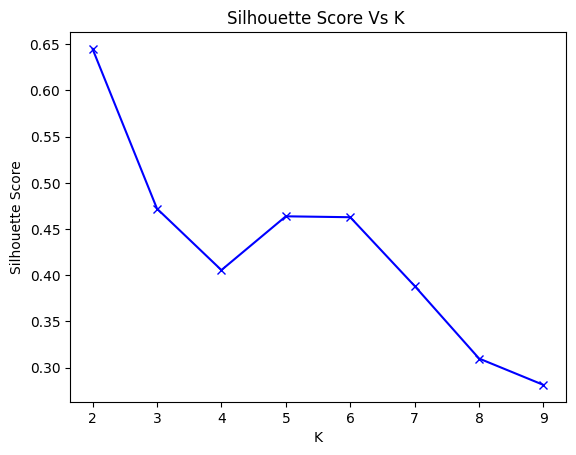

In [19]:
# Plot the elbow
plt.plot(K[1:], silScore, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Vs K ')
plt.show()      # ค่า silhouette ยิ่งสูงยิ่งดี

In [ ]:
X

In [20]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

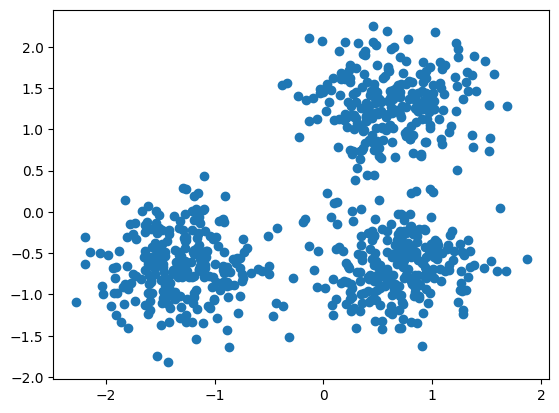

In [21]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [22]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=2, n_init=10, random_state=0).fit(X)
print("labels : ",  kmeans.labels_)

labels :  [0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0
 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1
 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1
 0 1 0 0 0 0 1 

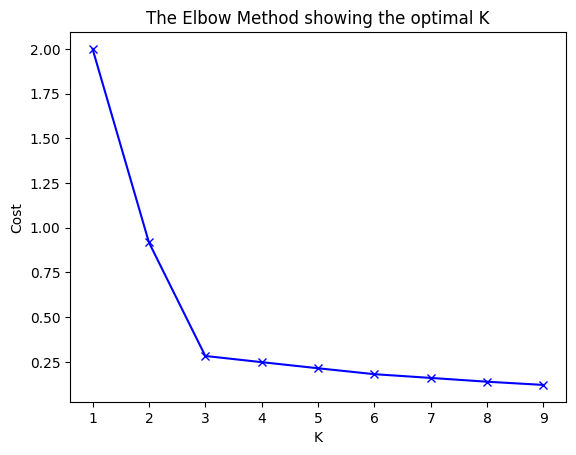

In [23]:

cost = []
silScore = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=10).fit(X)
    kmeans = kmeanModel.fit(X)
    cost.append(kmeans.inertia_/ X.shape[0])
    if k > 1 : silScore.append(metrics.silhouette_score(X, kmeans.labels_))
    #print("labels : ",  kmeans.labels_)


# Plot the elbow
plt.plot(K, cost, 'bx-')
plt.xlabel('K')
plt.ylabel('Cost')
plt.title('The Elbow Method showing the optimal K')
plt.show()

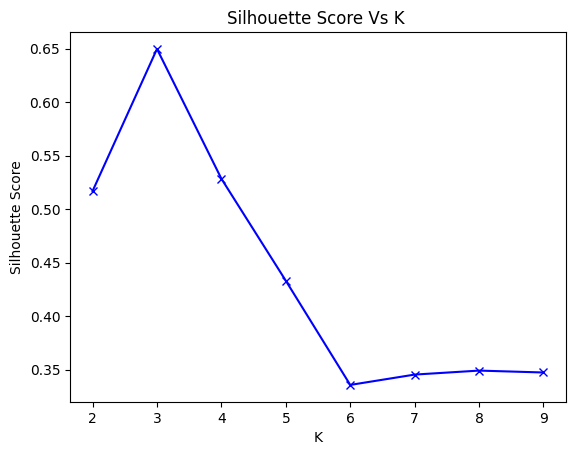

In [24]:
# Plot the elbow
plt.plot(K[1:], silScore, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Vs K ')
plt.show()

### Exercise 1
ให้ใช้ข้อมูล iris แบ่งข้อด้วย K-means โดยใช้ Library Scikit-learn กำหนดให้ k = 3 จงคำนวนค่า centroid ของทั้ง 3 cluster

In [25]:
from sklearn import datasets
X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

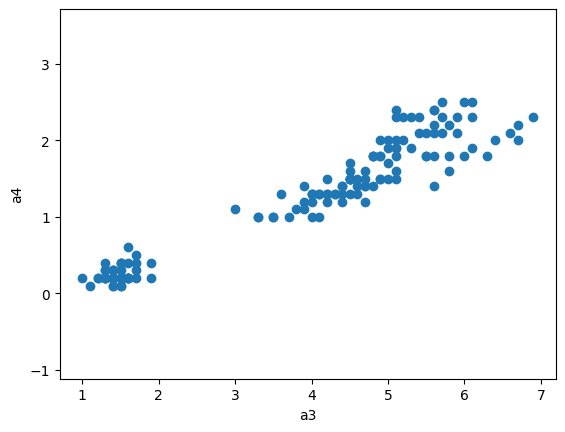

In [26]:
plt.xlabel('a3')
plt.ylabel('a4')
plt.axis("equal")
plt.scatter(X[:,2], X[:,3])

In [27]:
from sklearn.cluster import KMeans
### BEGIN SOLUTION

data = X # pd.DataFrame(X, columns=['x1', 'x2'])
kmeans = KMeans(n_clusters= 3, n_init = 10, random_state= 0).fit(data)

### END SOLUTION
print("labels : ",  kmeans.labels_)
for i, center in enumerate(kmeans.cluster_centers_):
  print("center %d:" % i, center)

labels :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
center 0: [5.9016129  2.7483871  4.39354839 1.43387097]
center 1: [5.006 3.428 1.462 0.246]
center 2: [6.85       3.07368421 5.74210526 2.07105263]


### Exercise 2
จาก Exercise 1 จงแสดงกราฟ Cost vs Elbow เพื่อหาค่า k ที่ดีที่สุด

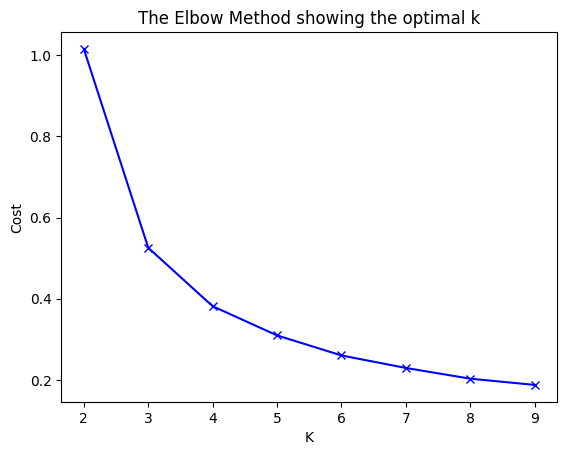

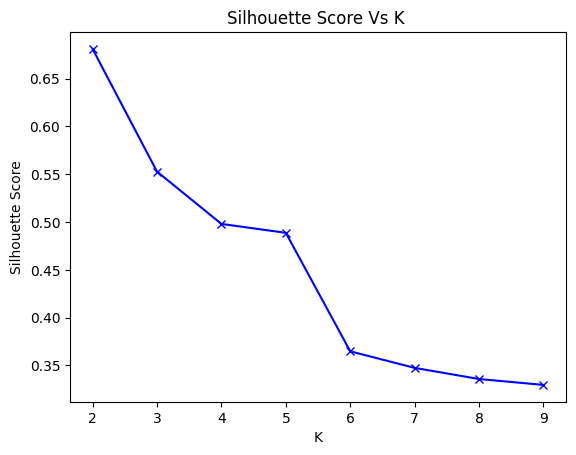

In [30]:
'''สำหรับข้อนี้เมื่อพลอตแล้วจะเห็นว่าการตัดสินจาก 2 วิธี
elbow  ==>  K=2
Sil..  ==>  K=3
สรุปไม่ได้  จึงลองทำการเซ็ทใหม่ให้ elbow มี K เริ่มตั้งแต่ 1
ส่วน sil.. ไม่สามารถรันได้ที่ค่า k<2  
เมื่อทำตามนี้จะได้ค่า k ที่ดีจาก elbow = 2 เช่นกันกับ วิธี Sil..'''

from scipy.spatial.distance import cdist    
# k means determine k
cost = []
silScore = []
K = range(2,10)

#==============================================
### BEGIN SOLUTION
for k in K:
    kmeanModel = KMeans(n_clusters= k,  n_init = 10).fit(X)
    kmeans = kmeanModel.fit(X)
    cost.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean')**2, axis=1)) / X.shape[0])
    silScore.append(metrics.silhouette_score(data, kmeans.labels_))
### END SOLUTION

#==============================================

# Plot the elbow
plt.plot(K, cost, 'bx-')
plt.xlabel('K')
plt.ylabel('Cost')
plt.title('The Elbow Method showing the optimal k')
plt.show()


# Plot the elbow
plt.plot(K, silScore, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Vs K ')
plt.show()